<a href="https://colab.research.google.com/github/kietng262/spotifyproject/blob/main/python_project_kiet_nguyen.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Striking a Chord: Leveraging Spotify Insights to Forecast Hit Tracks for Musicians**

# **Introduction**
In the world of making and listening to music, figuring out what makes a song really popular is a mix of art and science. Things like the beat, tune, speed, and other parts of the music are super important for a song to do well. My project aims to help musicians by looking at music and using data to understand what makes songs stand out.

---




# **Objective:**
By delving into the wealth of musical attributes within Spotify's dataset, my project aims to decode the winning elements that resonate with audiences. Through the synergy of data analysis and musical artistry, my findings will serve as a compass, empowering artists by analyzing successful track features, predicting hit potential, and offering tailored guidance to aid in the composition of commercially viable and popular music.

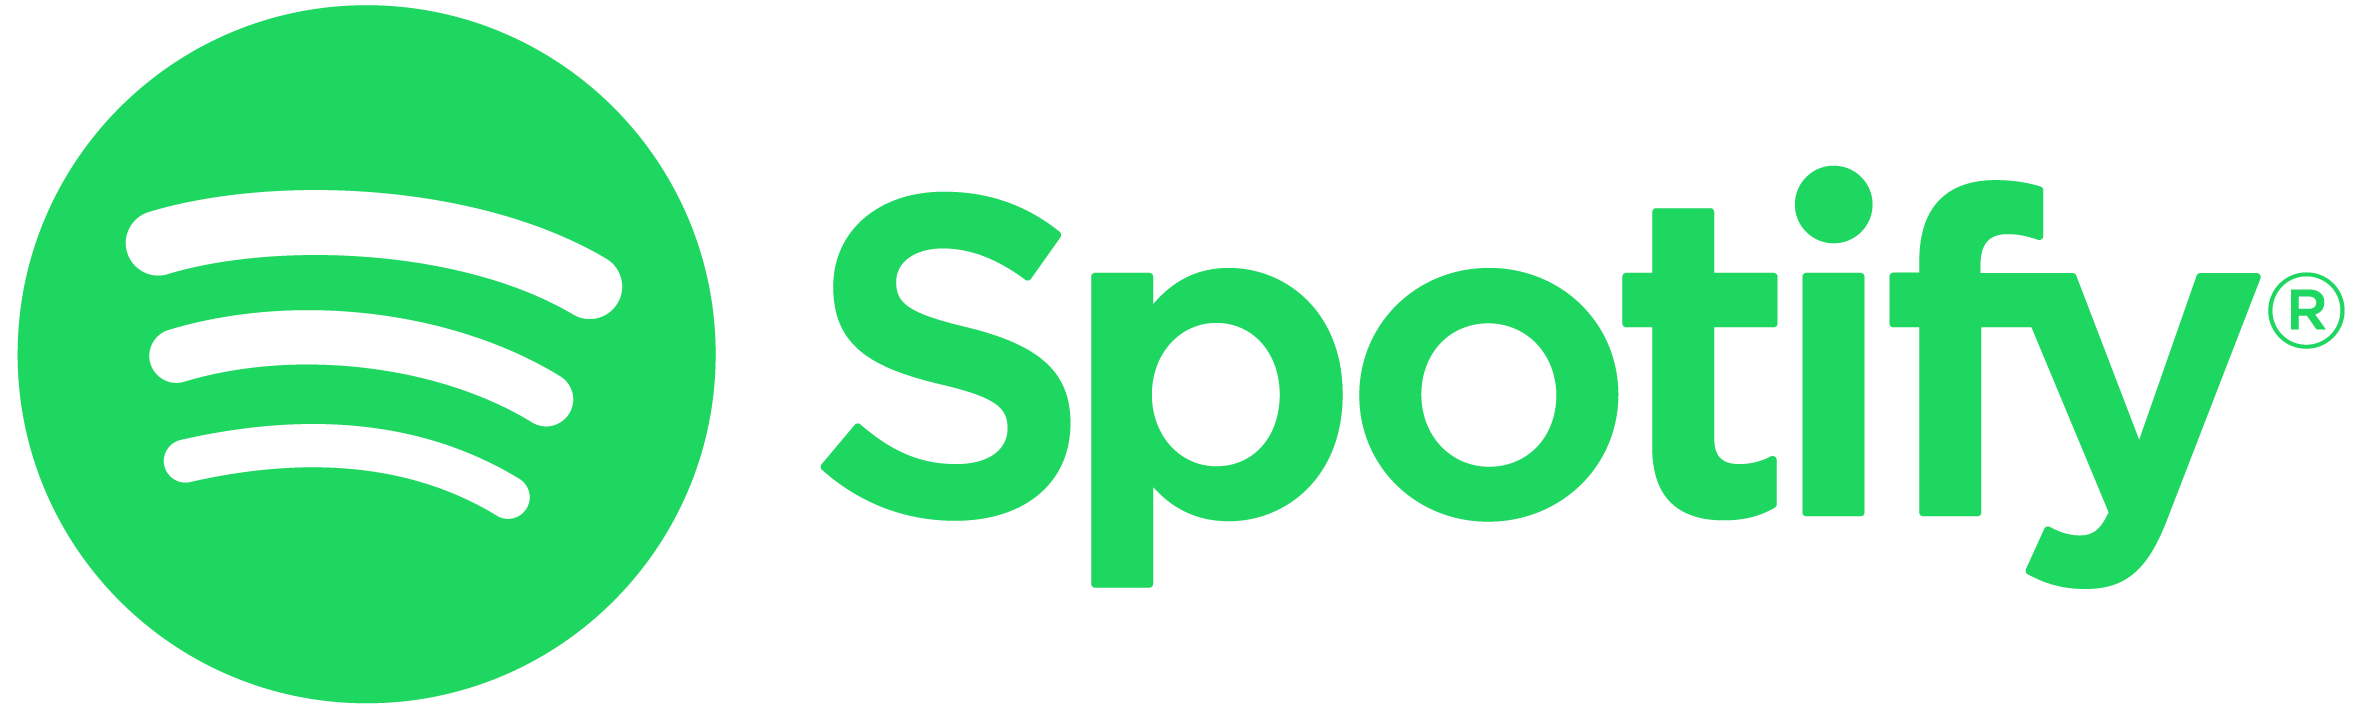

---

# **Analytical questions**
We'll investigate how a song gains popularity by analyzing audio features, exploring the impact of artists, and assessing its presence across multiple platforms. Each aspect will raise an analytical question to delve into:

* What are the prevalent audio features that tend to correlate with a song's success or popularity?
* What's the correlation between specific artists' involvement or their attributes and the success of a song?
* How does the frequency of a song's appearance in music charts compare to its prevalence in curated playlists across various platforms?

---



# **Dataset selection and description:**
Dataset: [**Most Streamed Spotify Songs 2023**](https://www.kaggle.com/datasets/nelgiriyewithana/top-spotify-songs-2023)  (last updated: August 26, 2023)



This dataset has lots of details about many different songs you can find on Spotify, Apple Music, Deezer, and Shazam. Each song in the dataset has a bunch of information about it, which helps us understand what the song is like and how well it does on these platforms. Important details in the dataset include:

*   **Track Name**: Title of the song.
*   **Artist(s) Name**: Name of the artist(s) responsible for the song.
*   **Artist Count**: Number of artists contributing to the song.
*   **Release Year/Month/Day**: Date of the song's release.
*   **Spotify, Apple Music, Deezer, Shazam Playlists and Charts**: Metrics indicating
the song's presence in Spotify playlists and its performance on Spotify charts.
*   **Streams**: Total count of streams the song has amassed on Spotify.
*   **Audio’s features**: BPM (Beats per minute), key, mode, danceability, valence,
energy, acousticness, instrumentalness, liveness, and speechiness.




In [ ]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Load the dataset into pandas dataframe
spotify = pd.read_excel("/content/spotify2023.xlsx")

# Explore basic characteristics
spotify.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6


In [ ]:
spotify.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   track_name            953 non-null    object 
 1   artist(s)_name        953 non-null    object 
 2   artist_count          953 non-null    int64  
 3   released_year         953 non-null    int64  
 4   released_month        953 non-null    int64  
 5   released_day          953 non-null    int64  
 6   in_spotify_playlists  953 non-null    int64  
 7   in_spotify_charts     953 non-null    int64  
 8   streams               953 non-null    object 
 9   in_apple_playlists    953 non-null    int64  
 10  in_apple_charts       953 non-null    int64  
 11  in_deezer_playlists   953 non-null    int64  
 12  in_deezer_charts      953 non-null    int64  
 13  in_shazam_charts      903 non-null    float64
 14  bpm                   953 non-null    int64  
 15  key                   8

# **1. CHANGE COLUMN TYPE**
*   The **"streams"** column is of the type object. For meaningful analyses, we need the age to be of a numeric type.

In [ ]:
# Convert the 'streams' column to numeric
spotify["streams"] = pd.to_numeric(spotify["streams"], errors = "coerce")
spotify.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   track_name            953 non-null    object 
 1   artist(s)_name        953 non-null    object 
 2   artist_count          953 non-null    int64  
 3   released_year         953 non-null    int64  
 4   released_month        953 non-null    int64  
 5   released_day          953 non-null    int64  
 6   in_spotify_playlists  953 non-null    int64  
 7   in_spotify_charts     953 non-null    int64  
 8   streams               952 non-null    float64
 9   in_apple_playlists    953 non-null    int64  
 10  in_apple_charts       953 non-null    int64  
 11  in_deezer_playlists   953 non-null    int64  
 12  in_deezer_charts      953 non-null    int64  
 13  in_shazam_charts      903 non-null    float64
 14  bpm                   953 non-null    int64  
 15  key                   8

# **2. DATA CLEANING**


*   The **"streams"** column: 1 missing value.
*   The **"in_shazam_charts"** column: 50 missing values.
*   The **"key"** column: 95 missing values.

In [ ]:
# Define total missing values in the dataset
total_missing_values = spotify.isnull().sum().sum()
print(f"Total number of missing value in the dataset: {total_missing_values}")

Total number of missing value in the dataset: 146


In [ ]:
# The proportion of missing values in the dataset
total_cells = np.product(spotify.shape)
proportion_of_missing_values = total_missing_values / total_cells * 100
print(f"Proportion of missing data: {proportion_of_missing_values:.2f}%")

Proportion of missing data: 0.64%


### **2.1. OBJECT COLUMNS**
* Replaces missing values with the **mode** of the column. It's a straightforward approach suitable for categorical or discrete data, maintaining the original distribution by using the most frequent value in place of missing entries.

In [ ]:
# Define which object columns contain missing values
object_columns = spotify.select_dtypes(include=["object"]).columns[spotify.select_dtypes(include='object').isnull().any()]
object_columns

Index(['key'], dtype='object')

In [ ]:
# Mode imputation
for column in object_columns:
    mode_value = spotify[column].mode().iloc[0]
    spotify[column].fillna(mode_value, inplace=True)

In [ ]:
spotify.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   track_name            953 non-null    object 
 1   artist(s)_name        953 non-null    object 
 2   artist_count          953 non-null    int64  
 3   released_year         953 non-null    int64  
 4   released_month        953 non-null    int64  
 5   released_day          953 non-null    int64  
 6   in_spotify_playlists  953 non-null    int64  
 7   in_spotify_charts     953 non-null    int64  
 8   streams               952 non-null    float64
 9   in_apple_playlists    953 non-null    int64  
 10  in_apple_charts       953 non-null    int64  
 11  in_deezer_playlists   953 non-null    int64  
 12  in_deezer_charts      953 non-null    int64  
 13  in_shazam_charts      903 non-null    float64
 14  bpm                   953 non-null    int64  
 15  key                   9

### **2.2. NUMERIC COLUMNS**
* Filling missing values with a representative constant, based on the **mean**. This methodology helps maintain the numerical structure of the data.

In [ ]:
# Mean imputation
mean_values = spotify.mean(numeric_only=True)
spotify.fillna(mean_values, inplace=True)

In [ ]:
spotify.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   track_name            953 non-null    object 
 1   artist(s)_name        953 non-null    object 
 2   artist_count          953 non-null    int64  
 3   released_year         953 non-null    int64  
 4   released_month        953 non-null    int64  
 5   released_day          953 non-null    int64  
 6   in_spotify_playlists  953 non-null    int64  
 7   in_spotify_charts     953 non-null    int64  
 8   streams               953 non-null    float64
 9   in_apple_playlists    953 non-null    int64  
 10  in_apple_charts       953 non-null    int64  
 11  in_deezer_playlists   953 non-null    int64  
 12  in_deezer_charts      953 non-null    int64  
 13  in_shazam_charts      953 non-null    float64
 14  bpm                   953 non-null    int64  
 15  key                   9

# **3. EXPLORATORY ANALYSIS**

## **3.1. Music Analysis**:


*   Analyze audio features like tempo, danceability, energy, valence, etc., to identify patterns in popular songs
*   Determining the exact number of streams that define a hit song can vary significantly based on factors. But in a broad sense, for popular streaming platforms like **Spotify** or **Apple Music**, a song often starts to gain attention when it reaches hundreds of thousands to millions of streams. In this project, we will assume that songs with more than **500 million streams** are hits.


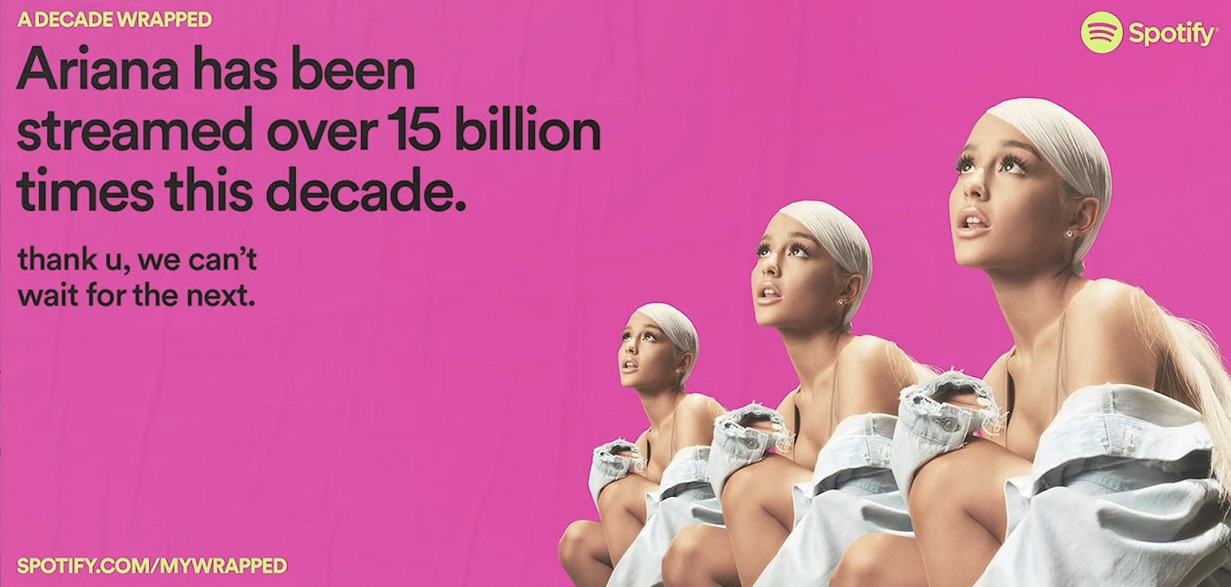

###**Audio Features Distribution**
*   By identifying the most prevalent features in songs, we can aid musicians in adjusting their future song distributions to align with current trends and ensure their songs' features are in line with audience preferences.




In [ ]:
# Assume hit songs which are songs having more than 500 million streams
hit_songs = spotify[spotify["streams"] > 500000000]
hit_songs.shape

(309, 24)



*   There're **309 hit songs** in the dataset. Now, we are going to do analysis on certains features that could affect the popularity of the song.



In [ ]:
# Using a list to determine which feature we want to conduct analysis on
selected_features = ["danceability_%", "valence_%", "energy_%", "acousticness_%", "instrumentalness_%", "liveness_%", "speechiness_%"]
relevant_data = hit_songs[selected_features]
relevant_data.head()

,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
3,55,58,72,11,0,11,15
6,67,83,76,48,0,8,3
9,81,56,48,21,0,8,33
10,57,56,72,23,0,27,5
12,71,65,68,6,0,3,7


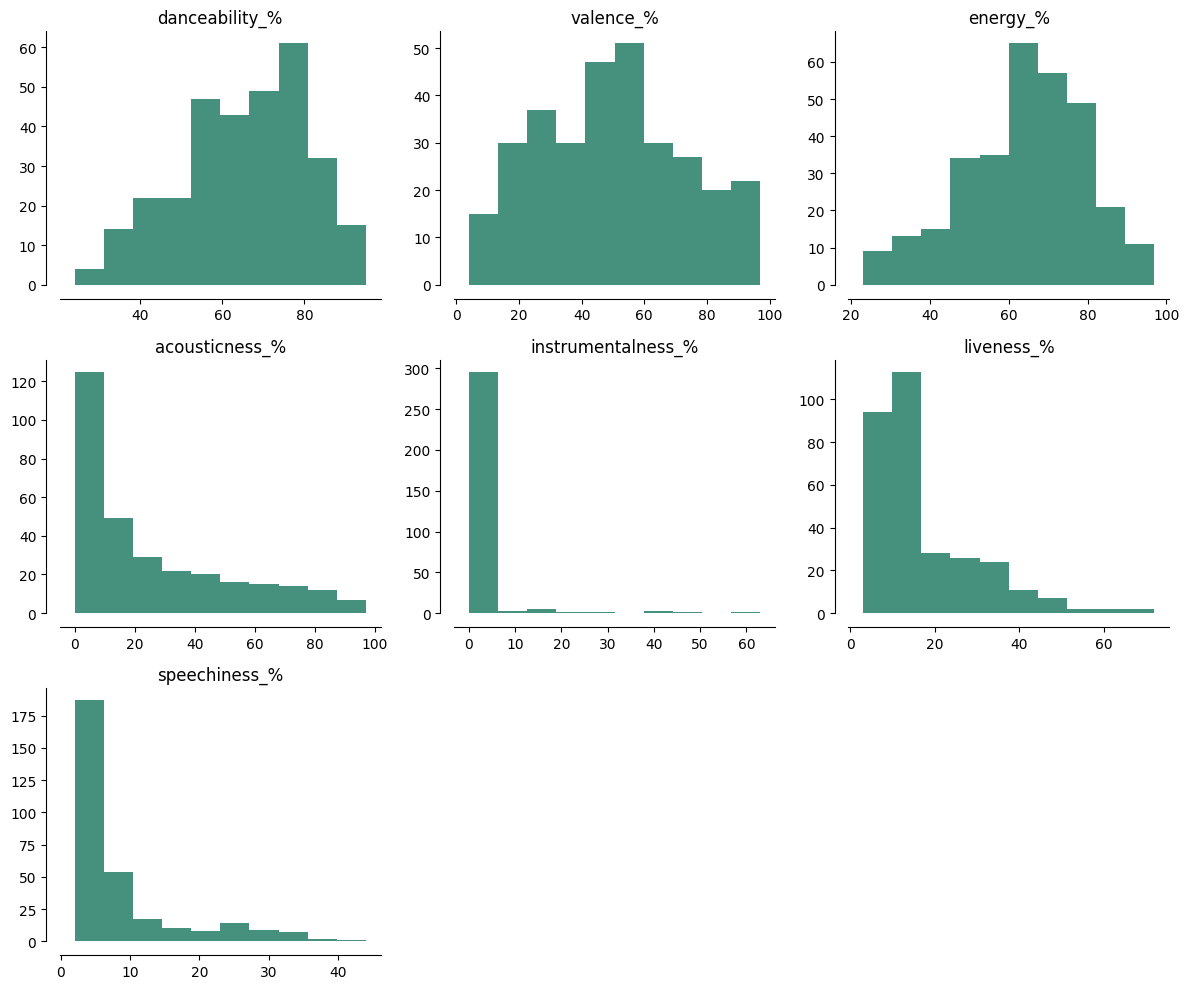

In [ ]:
# Visualize using histogram to assess the distributions of those selected features
relevant_data.hist(bins=10, figsize=(12, 10), grid=False, color="#46917d")
sns.despine(offset=10, trim=False)
title = ["a", "b", "c", "d", "e", "f", "g"]
plt.title(title)
plt.tight_layout()
plt.savefig("features_distribution.png")
plt.show()

In analyzing hit songs, distinct audio patterns contribute to specific percentages. Notably, **Danceability, Valence, and Energy** hold a higher share in song compositions. Surprisingly, features like **Acousticness or Instrumentalness**, despite having lower percentages, are included in songs **twice** as frequently compared to those with higher percentages in these traits.

In essence, hit songs are likely a result of a complex interplay of various audio features, where some dominant traits stand out while others, despite being less prevalent, contribute significantly to the overall composition, adding depth and diversity to the music.


###**Distribution of Features in Top Songs**
*   Next, we'll investigate if the distribution of the most streamed songs aligns with our findings. If it does, we can consider adjusting the balance of more common features against less prevalent ones to better match this pattern.





In [ ]:
# Define top 3 most streamed songs and view their characteristics distribution
top_10_most_streamed = hit_songs.sort_values(by="streams", ascending=False).iloc[:3,:].set_index("track_name").reset_index()
top_10_most_streamed

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Blinding Lights,The Weeknd,1,2019,11,29,43899,69,3.703895e+09,672,...,171,C#,Major,50,38,80,0,0,9,7
1,Shape of You,Ed Sheeran,1,2017,1,6,32181,10,3.562544e+09,33,...,96,C#,Minor,83,93,65,58,0,9,8
2,Someone You Loved,Lewis Capaldi,1,2018,11,8,17836,53,2.887242e+09,440,...,110,C#,Major,50,45,41,75,0,11,3


* Above are the top three most streamed songs. Let's delve into the audio features of these songs to see if they align with our previous analysis.

**1. Blinding Lights - The Weeknd**

In [ ]:
# Blinding lights's characteristic distribution
blinding_lights = top_10_most_streamed.iloc[0][selected_features]
blinding_lights

danceability_%        50
valence_%             38
energy_%              80
acousticness_%         0
instrumentalness_%     0
liveness_%             9
speechiness_%          7
Name: 0, dtype: object

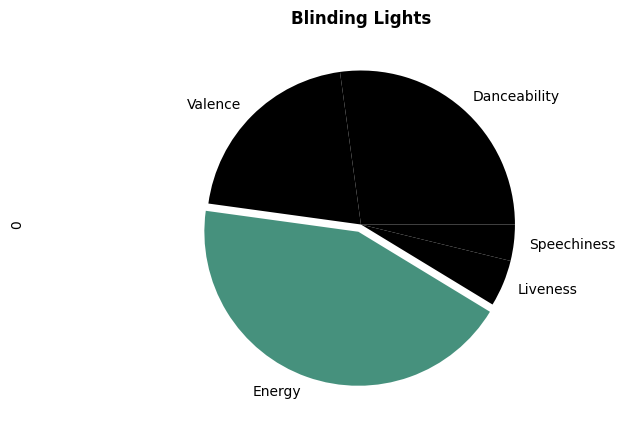

In [ ]:
# Visualize the feature distribution with a bar graph to highlight the most impactful features
labels = ["Danceability", "Valence", "Energy", "Acousticness", "Instrumentalness", "Liveness", "Speechiness"]
colors = ("000000", "#000000", "#46917d", "#46917d", "#46917d", "#000000","#000000")
explode = (0, 0, 0.05, 0, 0, 0, 0)
blinding_lights.plot(kind='pie', subplots=True, figsize=(10, 5), labels=labels, explode=explode, startangle=0, colors=colors)
plt.title("Blinding Lights", fontweight="bold")
sns.despine(offset=100)
plt.savefig("blinding_lights.png")
plt.show()

**2. Shape Of You - Ed Sheeran**

In [ ]:
# Shape of you's characteristic distribution
shape_of_you = top_10_most_streamed.iloc[1][selected_features]
shape_of_you

danceability_%        83
valence_%             93
energy_%              65
acousticness_%        58
instrumentalness_%     0
liveness_%             9
speechiness_%          8
Name: 1, dtype: object

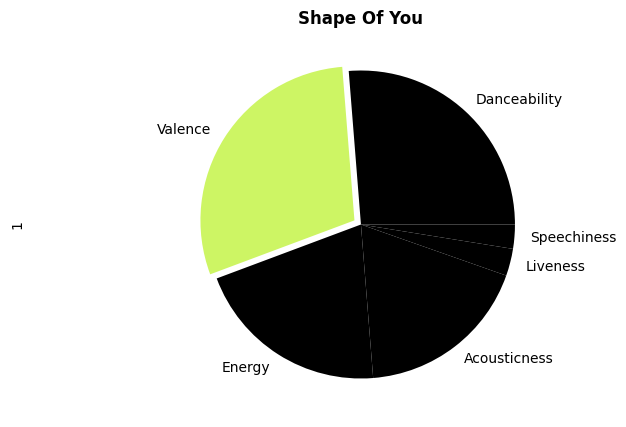

In [ ]:
# Visualize the characteristics' distribution
labels = ["Danceability", "Valence", "Energy", "Acousticness", "Instrumentalness", "Liveness", "Speechiness"]
colors = ("000000", "#cdf564", "000000", "#000000", "#000000", "#000000","#000000")
explode = (0, 0.05, 0, 0, 0, 0, 0)
shape_of_you.plot(kind='pie', subplots=True, figsize=(10, 5), labels=labels, explode=explode, startangle=0, colors=colors)
plt.title("Shape Of You", fontweight="bold")
sns.despine(offset=100)
plt.savefig("shape_of_you.png")
plt.show()

**3. Someone You Loved - Lewis Capaldi**

In [ ]:
# Someone you loved's characteristic distribution
someone_you_loved = top_10_most_streamed.iloc[2][selected_features]
someone_you_loved

danceability_%        50
valence_%             45
energy_%              41
acousticness_%        75
instrumentalness_%     0
liveness_%            11
speechiness_%          3
Name: 2, dtype: object

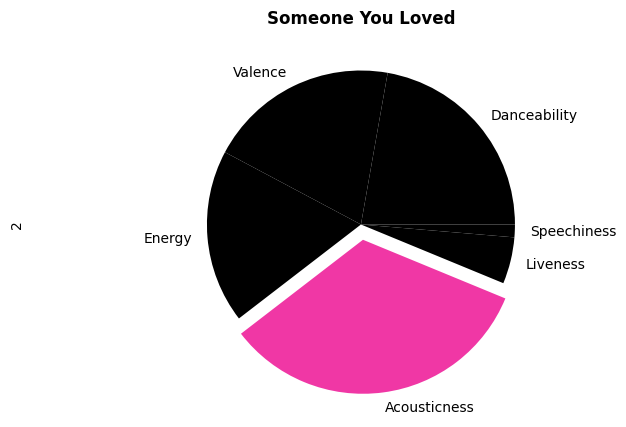

In [ ]:
# Visualize the characteristics' distribution
labels = ["Danceability", "Valence", "Energy", "Acousticness", "Instrumentalness", "Liveness", "Speechiness"]
colors = ("#000000", "#000000", "#000000", "#f037a5", "#000000", "#000000","#000000")
explode = (0, 0, 0, 0.1, 0, 0, 0)
someone_you_loved.plot(kind='pie', subplots=True, figsize=(10, 5), labels=labels, explode=explode, startangle=0, colors=colors)
plt.title("Someone You Loved", fontweight="bold")
sns.despine(offset=100)
plt.savefig("so_you_loved.png")
plt.show()

The analysis reaffirms our prior findings that metrics assessing dance suitability, positivity, and perceived energy remain significant contributors to song composition in these hit tracks. Even in **'Someone You Loved**,' where Acousticness holds the highest percentage, Energy, Valence, and Danceability maintain notable shares, almost equivalent to that of Acousticness.





###**Correlation between Streams and Audio Characteristics' Distribution**

**1. The correlation between Energy and Streams**

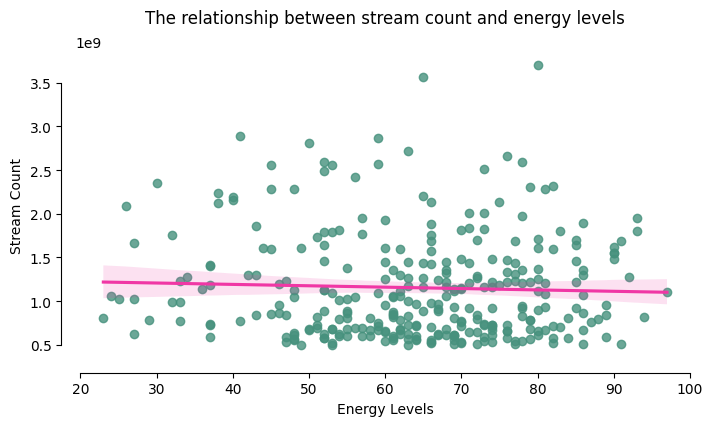

In [ ]:
# Energy and Streams
plt.figure(figsize=(8,4))
sns.regplot(x="energy_%", y="streams", data=hit_songs, color="#46917d", line_kws={"color":"#f037a5"})
plt.title("The relationship between stream count and energy levels", pad=20)
plt.xlabel("Energy Levels")
plt.ylabel("Stream Count")
sns.despine(offset=10, trim=True)
plt.show()

**2. The correlation between Danceability and Streams**

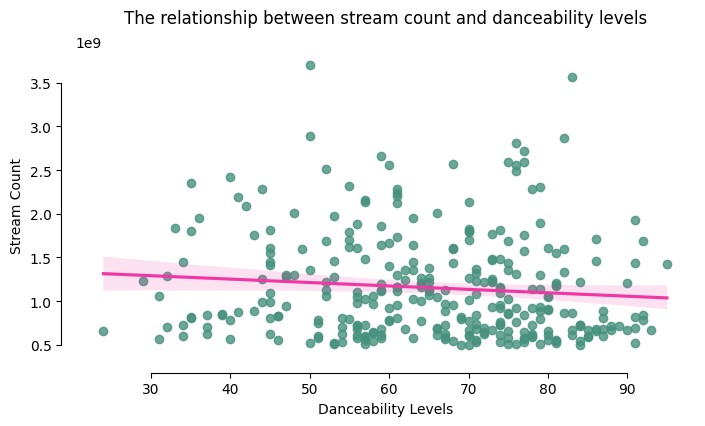

In [ ]:
# Danceability and Streams
plt.figure(figsize=(8,4))
sns.regplot(x="danceability_%", y="streams", data=hit_songs, color="#46917d", line_kws={"color":"#f037a5"})
plt.title("The relationship between stream count and danceability levels", pad=20)
plt.xlabel("Danceability Levels")
plt.ylabel("Stream Count")
sns.despine(offset=10, trim=True)
plt.show()

**3. The correlation between Valence and Streams**

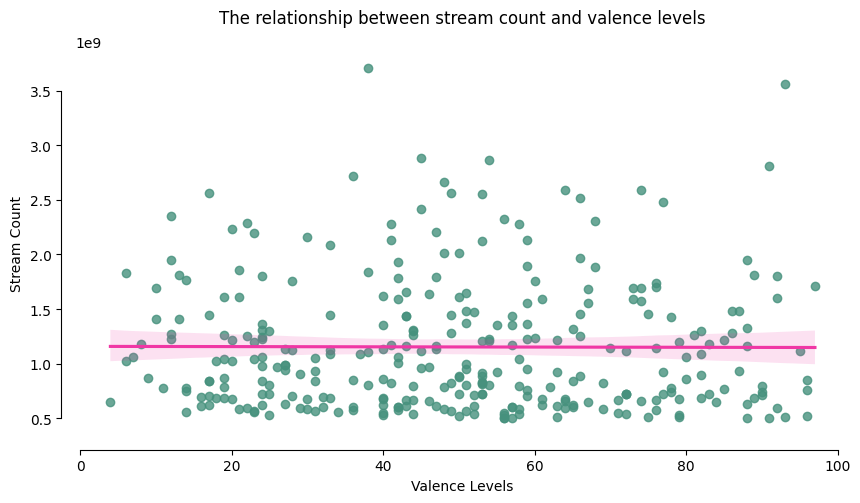

In [ ]:
# Valence and Streams
plt.figure(figsize=(10,5))
sns.regplot(x="valence_%", y="streams", data=hit_songs, color="#46917d", line_kws={"color":"#f037a5"})
plt.title("The relationship between stream count and valence levels", pad=20)
plt.xlabel("Valence Levels")
plt.ylabel("Stream Count")
sns.despine(offset=10, trim=True)
plt.show()

After this exploration, it appears that there is **minimal correlation** between audio characteristics and the stream count. Musicians aiming for specific purposes or genres in their songs can **flexibly adjust the percentages**. However, these findings can serve as a reference point, highlighting certain features as potential key elements accounting for specific proportions.




###**Evolution of Audio Feature Trends**
*   Determining which features the audience will prefer at a given time can be challenging. By tracking feature trends over years, we can anticipate which elements might become popular. This foresight allows for adjusting percentages to align with the general audience preferences.

**1. Analyzing the evolution of audio features across time**

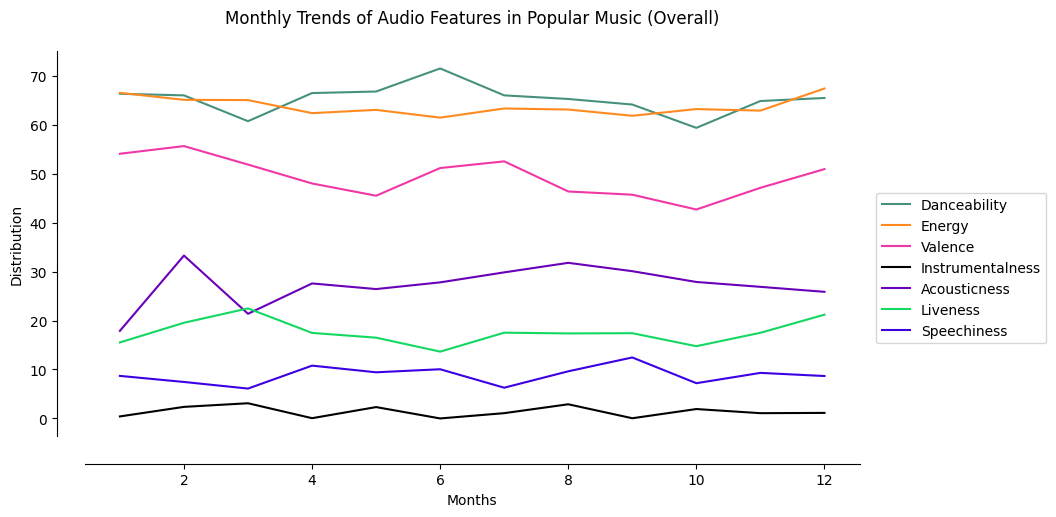

In [ ]:
# Select relevant columns including 'release_month' and audio features
relevant_columns_monthly = ['released_month', 'danceability_%', 'energy_%', 'valence_%', 'instrumentalness_%', "acousticness_%", "liveness_%", "speechiness_%"]
relevant_data_monthly = hit_songs[relevant_columns_monthly]

# Group data by 'release_month' and calculate mean values for each audio feature
monthly_means = relevant_data_monthly.groupby('released_month').mean()

# Plotting trends for audio features
colors = ['#46917d', '#ff8a20', '#f037a5', '#000000', "#6900ba", "#13d861", '#3d00e4']
plt.figure(figsize=(10, 5))

for i, feature in enumerate(relevant_columns_monthly[1:]):  # Exclude 'release_month'
    plt.plot(monthly_means.index, monthly_means[feature], label=feature, color=colors[i])

plt.title('Monthly Trends of Audio Features in Popular Music (Overall)', pad=20)
plt.xlabel("Months")
plt.ylabel("Distribution")
plt.legend(["Danceability", "Energy", "Valence", "Instrumentalness", "Acousticness", "Liveness", "Speechiness"], bbox_to_anchor=(1.25, 0.65))
plt.grid(False)
sns.despine(offset=20)
plt.savefig("time.png")
plt.show()

Three key features linked to **danceability, positivity, and energy** consistently hold the **highest percentages**. Moreover, Acousticness shows noticeable fluctuations across different periods. Musicians might prioritize these four features in their compositions. Yet, these findings reflect broad trends. For a more comprehensive understanding, we can delve into the trends of the past **five years** to identify potential variations."

**2. Analyzing the evolution of audio features from 2019 - 2023**

In [ ]:
# Define hit songs in the last 5 years
hit_songs['released_year'] = pd.to_datetime(hit_songs['released_year'], format='%Y')
hit_songs_5years = hit_songs[hit_songs["released_year"] > "2018"]
hit_songs_2023 = hit_songs_5years.sort_values(by="streams", ascending=False).set_index("track_name")
hit_songs_2023.head()

,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
track_name,,,,,,,,,,,,,,,,,,,,,
Blinding Lights,The Weeknd,1,2019-01-01,11,29,43899,69,3.703895e+09,672,199,...,171,C#,Major,50,38,80,0,0,9,7
Dance Monkey,Tones and I,1,2019-01-01,5,10,24529,0,2.864792e+09,533,167,...,98,F#,Minor,82,54,59,69,0,18,10
STAY (with Justin Bieber),"Justin Bieber, The Kid Laroi",2,2021-01-01,7,9,17050,36,2.665344e+09,492,99,...,170,C#,Major,59,48,76,4,0,10,5
Heat Waves,Glass Animals,1,2020-01-01,6,28,22543,63,2.557976e+09,386,144,...,81,B,Major,76,53,53,44,0,9,9
As It Was,Harry Styles,1,2022-01-01,3,31,23575,130,2.513188e+09,403,198,...,174,F#,Minor,52,66,73,34,0,31,6


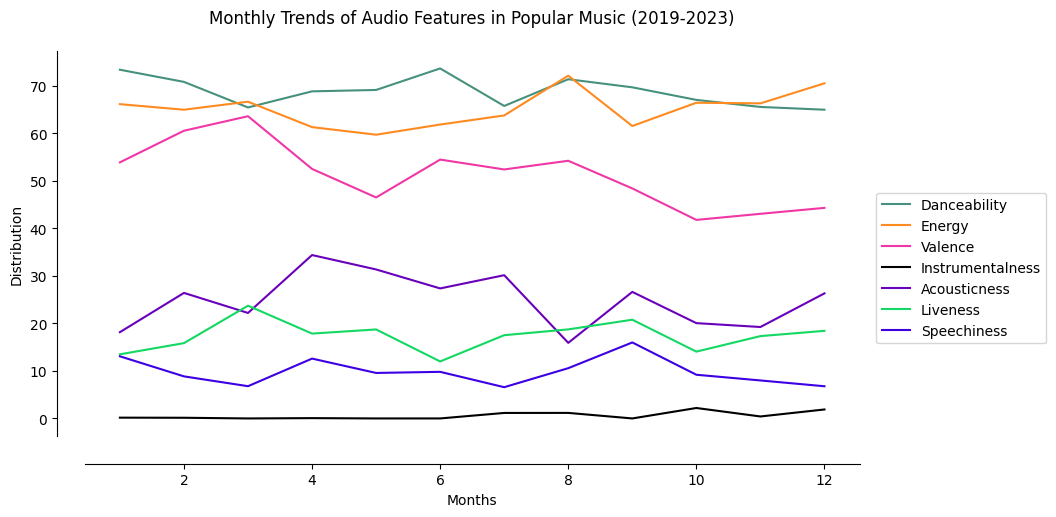

In [ ]:
# Select relevant columns including 'release_month' and audio features
relevant_columns_2023 = ['released_month', 'danceability_%', 'energy_%', 'valence_%', 'instrumentalness_%', "acousticness_%", "liveness_%", "speechiness_%"]
relevant_data_2023 = hit_songs_5years[relevant_columns_2023]

# Group data by 'release_month' and calculate mean values for each audio feature
means_2023 = relevant_data_2023.groupby('released_month').mean()

# Plotting temporal trends for audio features
colors = ['#46917d', '#ff8a20', '#f037a5', '#000000', "#6900ba", "#13d861", '#3d00e4']
plt.figure(figsize=(10, 5))

for i, feature in enumerate(relevant_columns_2023[1:]):
    plt.plot(means_2023.index, means_2023[feature], label=feature, color=colors[i])

plt.title("Monthly Trends of Audio Features in Popular Music (2019-2023)", pad=20)
plt.xlabel("Months")
plt.ylabel("Distribution")
plt.legend(["Danceability", "Energy", "Valence", "Instrumentalness", "Acousticness", "Liveness", "Speechiness"], bbox_to_anchor=(1.25, 0.65))
sns.despine(offset=20)
plt.savefig("2019-2023.jpeg")
plt.show()

Once again, Energy consistently stands apart from Danceability and links with Valence. But when Energy and Danceability match, Acousticness shows a different trend. This shows a general pattern staying the same while adjusting in smaller ways each month to match what's popular. Musicians can use these trends to adjust their music features and meet what listeners want at that time.

### **Keys and Mode**
* When musicians use different keys and modes in their music, it can show what emotions they want to create. Major keys usually make songs feel happier, while minor keys can make them feel sadder or more thoughtful. Looking at which keys or modes are common in popular songs or certain types of music helps us see what emotions people like and why music is so successful or meaningful to them.


In [ ]:
# Identify the primary keys prevalent in hit songs
keys = hit_songs.groupby("key")["key"].count()
keys

key
A     18
A#    23
B     25
C#    72
D     28
D#    10
E     24
F     30
F#    26
G     25
G#    28
Name: key, dtype: int64

In [ ]:
# Identify the primary mode prevalent in hit songs
mode = hit_songs.groupby("mode")["mode"].count()
mode

mode
Major    189
Minor    120
Name: mode, dtype: int64

In [ ]:
# counts the occurrences of different keys and modes
key_mode = pd.crosstab(index=hit_songs["key"],
            columns=hit_songs["mode"],
            margins=False,
            normalize=False)
key_mode

mode,Major,Minor
key,,
A,12,6
A#,13,10
B,7,18
C#,50,22
D,25,3
D#,4,6
E,9,15
F,17,13
F#,9,17


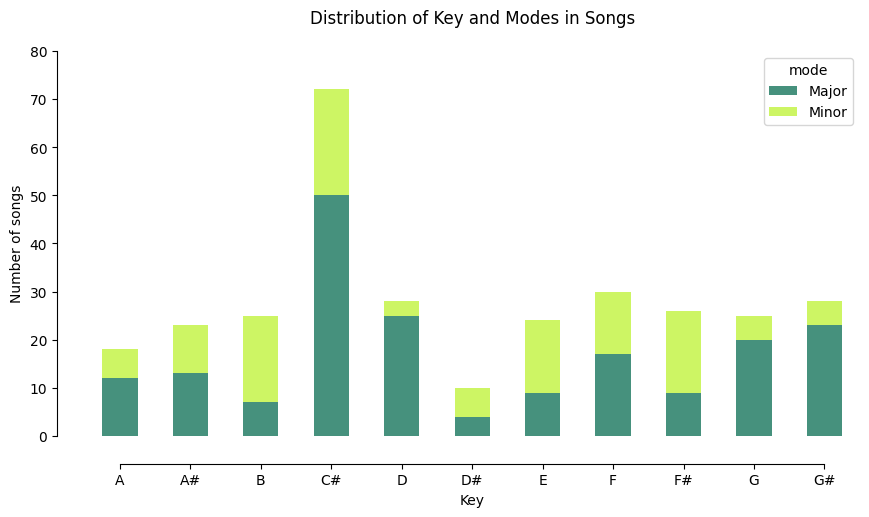

In [ ]:
# Display the distribution of keys and modes
key_mode.plot.bar(stacked=True, figsize=(10,5), color={"Major": "#46917d", "Minor": "#cdf564"})
plt.title("Distribution of Key and Modes in Songs", pad=20)
plt.xlabel("Key")
plt.ylabel("Number of songs")
plt.yticks(np.arange(0,90,10))
sns.despine(offset=20, trim=True)
plt.savefig("key_mode.png")
plt.show()

The stacked bar chart shows that C# is the most prevalent key, and within that key, the mode 'major' holds a higher frequency compared to the mode 'minor'. This suggests a dominance of major tonality within the key of C# among the hit songs analyzed. Composing a song in C# major could potentially align with prevalent trends seen in successful music.

* Let's filter the songs that exhibit these features to identify if they align with familiar and recent hit names.

In [ ]:
# Top five songs characterized by the key 'C#' and the mode 'Major'
mode = hit_songs_5years[(hit_songs_5years["key"] == "C#") & (hit_songs_5years["mode"] == "Major")].reset_index().set_index("track_name")
mode.sort_values(by="streams", ascending=False).iloc[:5]

,index,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
track_name,,,,,,,,,,,,,,,,,,,,,
Blinding Lights,55,The Weeknd,1,2019-01-01,11,29,43899,69,3.703895e+09,672,...,171,C#,Major,50,38,80,0,0,9,7
STAY (with Justin Bieber),84,"Justin Bieber, The Kid Laroi",2,2021-01-01,7,9,17050,36,2.665344e+09,492,...,170,C#,Major,59,48,76,4,0,10,5
Watermelon Sugar,127,Harry Styles,1,2019-01-01,11,17,21915,34,2.322580e+09,437,...,95,C#,Major,55,56,82,12,0,34,5
Circles,187,Post Malone,1,2019-01-01,8,30,19664,16,2.132336e+09,391,...,120,C#,Major,70,59,75,24,0,9,4
Save Your Tears,164,The Weeknd,1,2020-01-01,3,20,12688,13,1.591224e+09,197,...,118,C#,Major,68,61,82,2,0,50,3


 It's evident that these songs have been major hits in recent years. Musicians might find it beneficial to incorporate these prevalent keys and modes into their new compositions.

# **Tempo**
The speed of a song, called tempo, really affects how it feels. Faster tempos make it more lively, while slower ones make it calmer. Picking the right tempo is super important because it shapes how people feel about the music.

*   Does tempo impact the number of streams a song receives?



In [ ]:
# Define the average tempo
average_tempo = hit_songs.groupby("released_year")["bpm"].mean().mean()
print(f"The average tempo of hit songs: {average_tempo} beats per minute.")

The average tempo of hit songs: 121.11601182680006 beats per minute.


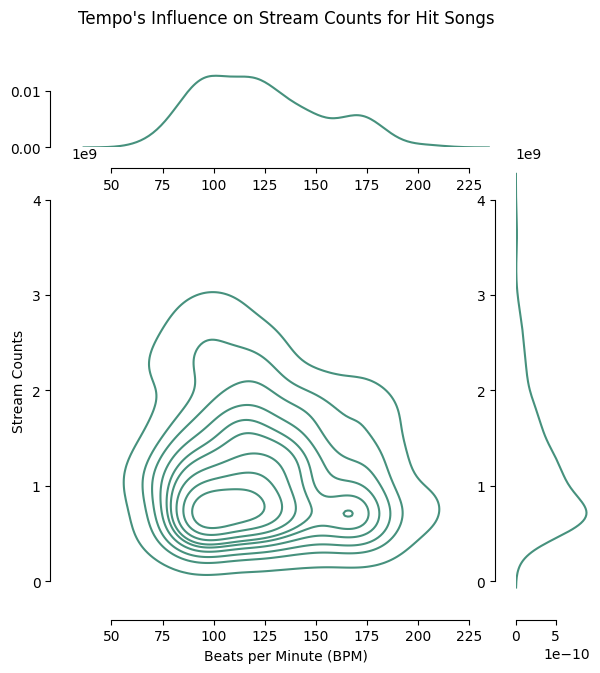

In [ ]:
# The relationship between BPM and the number of streams for hit songs
sns.jointplot(x="bpm", y="streams", data=hit_songs, kind="kde", color="#46917d")
plt.title("Tempo's Influence on Stream Counts for Hit Songs", y=1.3)
plt.xlabel("Beats per Minute (BPM)")
plt.ylabel("Stream Counts")
sns.despine(offset=15, trim=True)
plt.show()

In these popular songs, the average tempo is **121 beats per minute (BPM)**, even the most streamed song, with over 3.5 billion listens, sticks around that pace. Some songs at 180 BPM got over 2.5 billion listens, but they're not as common.
Composers who want lots of people to like their music might aim for a tempo around 120 BPM. That's a speed many people are used to, but still catchy for a big audience. But they should also think about the emotions they want to express, the music style, and what they want their song to be like, as we've seen before.


## **3.2. Artists Impact**:
Looking at how artists affect a song's success means checking things like how many times songs are played, how many hit songs an artist has, and how often they work with others. Songs with more than one artist might do better on charts, playlists, and get more listens, showing they might have a big effect on success.
*   We'll see which artists show up a lot in three areas: having lots of hit songs, getting the most listens per song, and having the most listens overall.

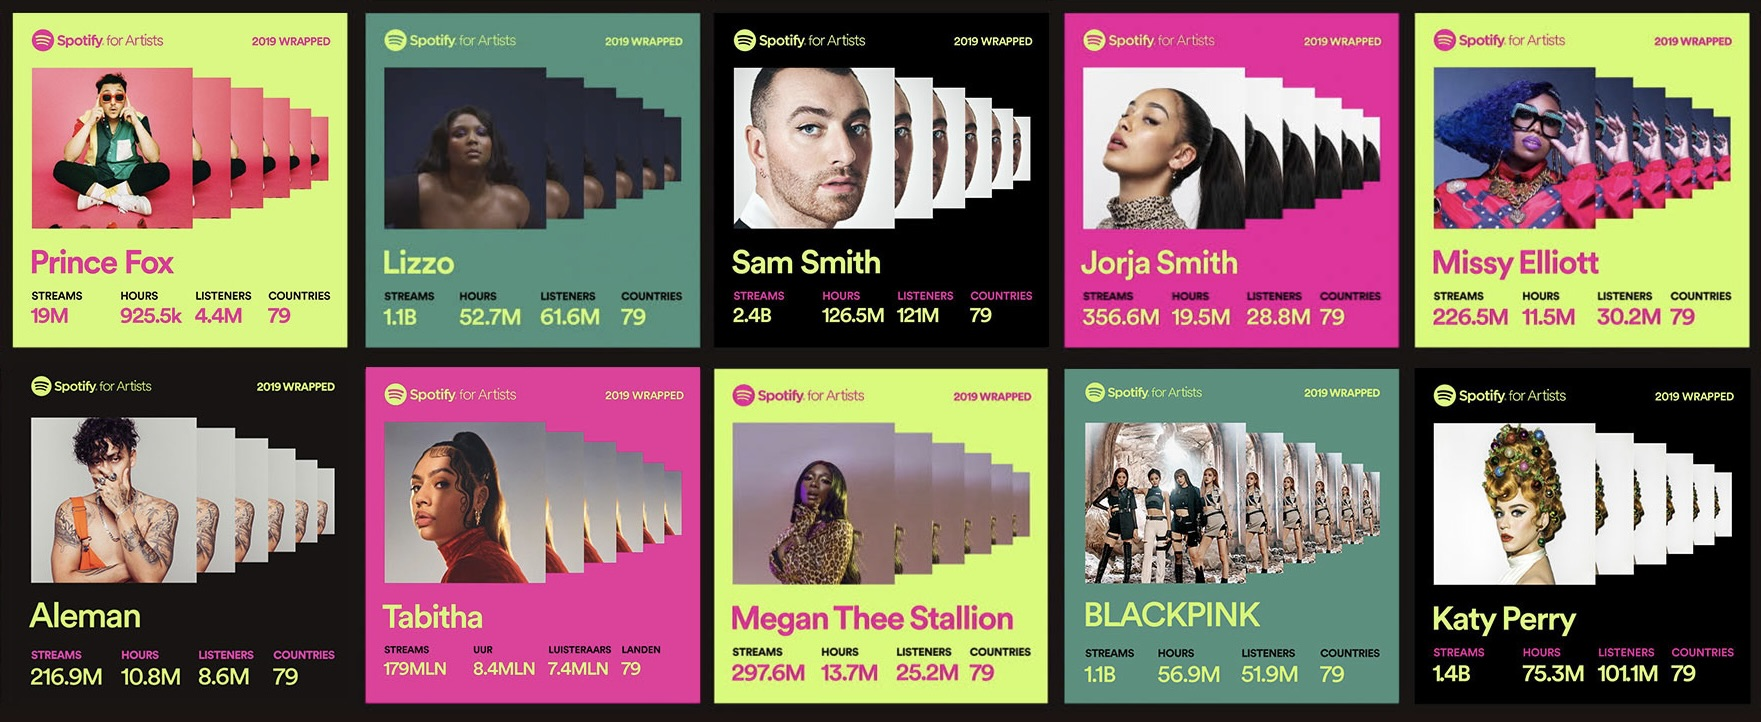

### **Artists with the Most Hit Songs**

In [ ]:
# Create a dictionary to store the count of songs for each artist
artist_song_count = {}

# Iterate through the dataset to count songs for each artist
for index, row in hit_songs.iterrows():
    artists = row['artist(s)_name'].split(',')  # Assuming names are separated by comma

    for artist in artists:
        artist = artist.strip()  # Remove extra spaces

        if artist in artist_song_count:
            artist_song_count[artist] += 1
        else:
            artist_song_count[artist] = 1

print(artist_song_count, end="\t")

{'Taylor Swift': 11, 'Eslabon Armado': 1, 'Peso Pluma': 2, 'Yng Lvcas': 1, 'Bad Bunny': 19, 'Grupo Frontera': 1, 'Miley Cyrus': 2, 'Harry Styles': 6, 'SZA': 3, 'Arctic Monkeys': 4, 'RÔøΩÔøΩma': 1, 'Selena G': 1, 'The Weeknd': 17, '21 Savage': 4, 'Metro Boomin': 1, 'Karol G': 3, 'Shakira': 3, 'Post Malone': 4, 'Swae Lee': 1, 'Bebe Rexha': 1, 'David Guetta': 1, 'Tyler': 1, 'The Creator': 1, 'Kali Uchis': 1, 'OneRepublic': 2, 'Daft Punk': 2, 'Ariana Grande': 4, 'Tom Odell': 1, 'Manuel Turizo': 1, 'Charlie Puth': 2, 'BTS': 6, 'Jung Kook': 1, 'Ozuna': 1, 'Feid': 3, 'Chris Molitor': 1, 'Glass Animals': 1, 'JVKE': 1, 'The Neighbourhood': 3, 'Bizarrap': 2, 'Quevedo': 1, 'Coldplay': 5, 'd4vd': 2, 'Sam Smith': 2, 'Kim Petras': 1, 'Yandel': 1, 'Vance Joy': 1, 'Em Beihold': 1, 'Stephen Sanchez': 2, 'Justin Bieber': 5, 'The Kid Laroi': 1, 'Lewis Capaldi': 2, 'Chencho Corleone': 2, 'Lana Del Rey': 2, 'Eminem': 8, 'Dua Lipa': 6, 'Elton John': 1, 'Pnau': 1, 'Ruth B.': 1, 'Imagine Dragons': 5, 'Adele':

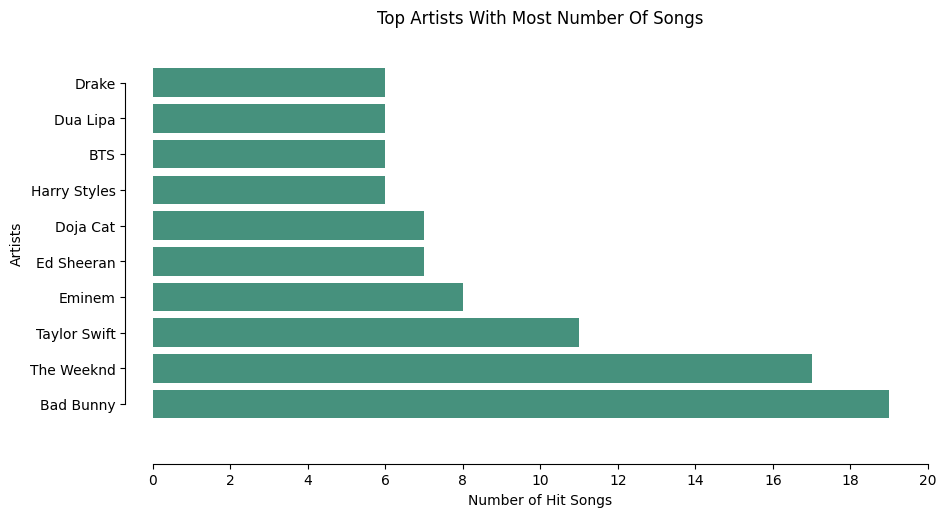

In [ ]:
# Bar chart visualizes hit song counts by top artists
most_hits = sorted(artist_song_count.items(), key = lambda x: x[1], reverse=True)[:10]
top_artists = [item[0] for item in most_hits]
number_of_songs = [item[1] for item in most_hits]


plt.figure(figsize=(10,5))
plt.barh(top_artists, number_of_songs, color="#46917d", )
plt.title("Top Artists With Most Number Of Songs", pad=20)
plt.xlabel("Number of Hit Songs")
plt.ylabel("Artists")
plt.xticks(np.arange(0, 22, 2))
sns.despine(offset=20, trim=True)
plt.show()

### **Artists with the Highest Stream Counts per Track**

In [ ]:
# Define top songs most streamed
top_artists_streams_per_track = hit_songs.groupby(["artist(s)_name", "track_name"])["streams"].mean().sort_values(ascending=False)
top_artists_streams_per_track = pd.DataFrame(top_artists_streams_per_track).reset_index()
top_artists_streams_per_track.head()

,artist(s)_name,track_name,streams
0,The Weeknd,Blinding Lights,3.703895e+09
1,Ed Sheeran,Shape of You,3.562544e+09
2,Lewis Capaldi,Someone You Loved,2.887242e+09
3,Tones and I,Dance Monkey,2.864792e+09
4,"Post Malone, Swae Lee",Sunflower - Spider-Man: Into the Spider-Verse,2.808097e+09


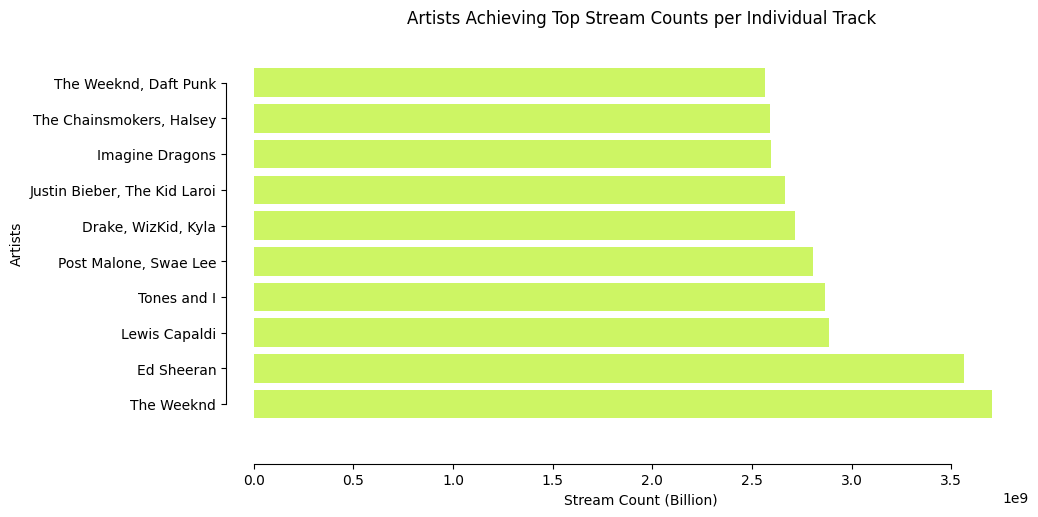

In [ ]:
# Top artists based on stream counts per track
plt.figure(figsize=(10,5))
plt.barh(top_artists_streams_per_track["artist(s)_name"][:10], top_artists_streams_per_track["streams"][:10], color="#cdf564")
plt.title("Artists Achieving Top Stream Counts per Individual Track", pad=20)
plt.xlabel("Stream Count (Billion)")
plt.ylabel("Artists")
sns.despine(offset=20, trim=True)
plt.show()

### **Top artists by Streaming Volumn**

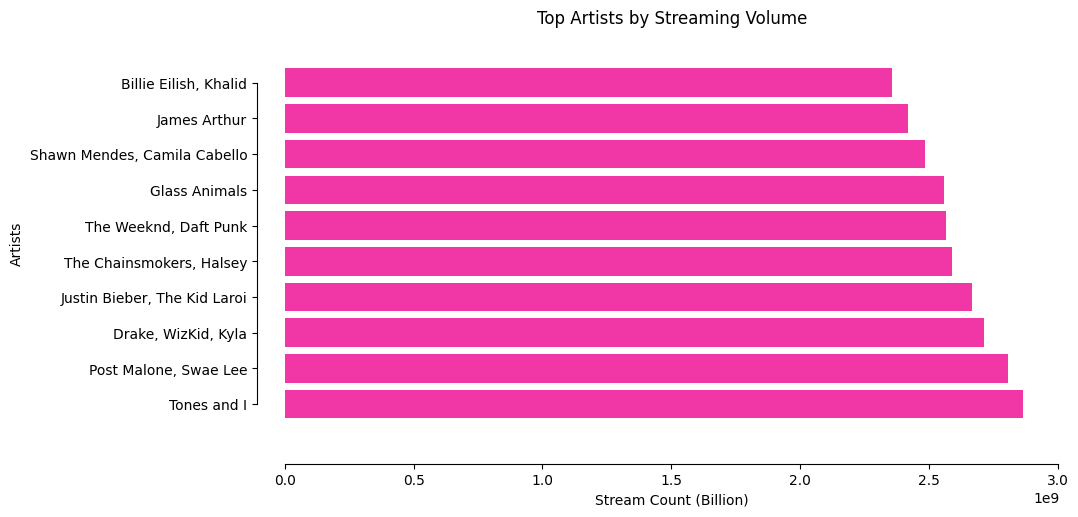

In [ ]:
# Collab frequency impact
top_artists_overall_streams = hit_songs.groupby('artist(s)_name')['streams'].mean().sort_values(ascending=False)
top_artists_overall_streams = pd.DataFrame(top_artists_overall_streams).reset_index()

plt.figure(figsize=(10,5))
plt.barh(top_artists_overall_streams["artist(s)_name"][:10], top_artists_overall_streams["streams"][:10], color="#f037a5")
plt.title("Top Artists by Streaming Volume", pad=20)
plt.xlabel("Stream Count (Billion)")
plt.ylabel("Artists")
plt.xticks()
sns.despine(offset=20, trim=True)
plt.show()

* Let's determine which artists appear in these three lists and analyze whether their success stems from individual impact or collaborations.

In [ ]:
# Define common artists who appear in these 3 lists
print("Artist have high number of hit songs and high streamed track:", set(top_artists) & set(top_artists_streams_per_track["artist(s)_name"][:10]))
print("Artist have high streamed track and high streaming volumn", set(top_artists_streams_per_track["artist(s)_name"][:10]) & set(top_artists_overall_streams["artist(s)_name"][:10]))

Artist have high number of hit songs and high streamed track: {'Ed Sheeran', 'The Weeknd'}
Artist have high streamed track and high streaming volumn {'Post Malone, Swae Lee', 'Justin Bieber, The Kid Laroi', 'The Weeknd, Daft Punk', 'The Chainsmokers, Halsey', 'Tones and I', 'Drake, WizKid, Kyla'}


 It's evident that **The Weeknd** stands out as the sole artist excelling across all three lists. However, his collaboration with **Daft Punk** notably enhances his position. Does this suggest a correlation between collaborative tracks and their potential to become hits? Let's investigate!

### **How does collaboration impact a song's potential for becoming a hit?**
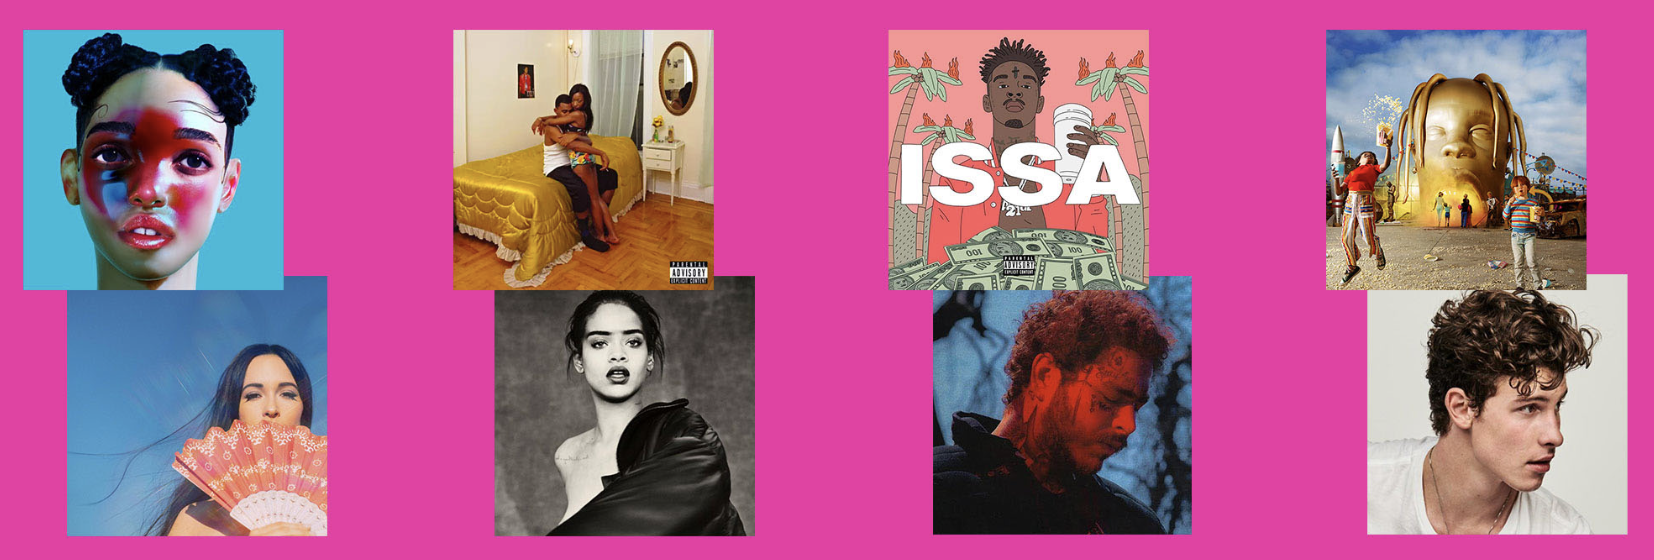

In [ ]:
# Determine if there's a correlation between number of artists in a song and its streams
artist_count_corr = hit_songs[['artist_count', 'streams']].corr()
artist_count_corr[:1]

,artist_count,streams
artist_count,1.0,-0.094165


In [ ]:
# Proportion of collaboration
collab_hit_songs = hit_songs[hit_songs["artist_count"] > 1]
total_collab_hit_songs = collab_hit_songs["track_name"].count()
total_hit_songs = hit_songs["track_name"].count()

collab_proportion = total_collab_hit_songs / total_hit_songs * 100
print(f"The proportion of collaboration: {collab_proportion:.2f} %")

The proportion of collaboration: 32.04 %


The number **-0.094** shows that having more artists in a song doesn't really change how much it's listened to. But about 32% of hit songs involve collaborations, showing they're pretty common in successful tracks. Even though it's not strongly linked to how many times a song is played, collaborations are still a big part of hit songs. So, teaming up with others can really help make a song successful.

### **Top Artists with the Highest Number of Collaborations**
* We'll delve into artists with the highest collaboration frequency, evaluating their performance to verify our hypothesis. Given that the **"artist(s)_name"** column contains both primary artists and their collaborators, I aim to separate these names to individually count the number of collaborations.

In [ ]:
# Create a copy dataframe to analyse
columns_to_keep = ["track_name", "artist(s)_name", "artist_count", "in_spotify_playlists", "in_spotify_charts", "streams"]
filtered_data = hit_songs[columns_to_keep].copy()
filtered_data.head()

,track_name,artist(s)_name,artist_count,in_spotify_playlists,in_spotify_charts,streams
3,Cruel Summer,Taylor Swift,1,7858,100,8.008408e+08
6,Ella Baila Sola,"Eslabon Armado, Peso Pluma",2,3090,50,7.259801e+08
9,La Bebe - Remix,"Peso Pluma, Yng Lvcas",2,2953,44,5.536341e+08
10,un x100to,"Bad Bunny, Grupo Frontera",2,2876,40,5.056714e+08
12,Flowers,Miley Cyrus,1,12211,115,1.316856e+09


In [ ]:
# Create a function to split and keep the first artist name in the original column
def split_artist_names(row):
    artists = row['artist(s)_name'].split(', ')
    row['artist(s)_name'] = artists[0]  # Keeping the first artist in 'artist_name' column
    if len(artists) > 1:
        row['other_artists'] = ', '.join(artists[1:])  # Store remaining artists in 'other_artists' column
    else:
        row['other_artists'] = ''  # Empty if no other artists
    return row

In [ ]:
# Split and rearrange columns names
collaborations_data = filtered_data.apply(split_artist_names, axis=1).reset_index(drop=True)
collaborations_data = collaborations_data[["track_name", "artist(s)_name", "other_artists", "artist_count", "in_spotify_playlists", "in_spotify_charts", "streams"]]
collaborations_data = collaborations_data[collaborations_data["artist_count"] > 1]
collaborations_data

,track_name,artist(s)_name,other_artists,artist_count,in_spotify_playlists,in_spotify_charts,streams
1,Ella Baila Sola,Eslabon Armado,Peso Pluma,2,3090,50,7.259801e+08
2,La Bebe - Remix,Peso Pluma,Yng Lvcas,2,2953,44,5.536341e+08
3,un x100to,Bad Bunny,Grupo Frontera,2,2876,40,5.056714e+08
8,Calm Down (with Selena Gomez),RÔøΩÔøΩma,Selena G,2,7112,77,8.991834e+08
9,Creepin',The Weeknd,"21 Savage, Metro Boomin",3,6036,88,8.439575e+08
...,...,...,...,...,...,...,...
283,Something Just Like This,The Chainsmokers,Coldplay,2,23375,21,2.204081e+09
284,Closer,The Chainsmokers,Halsey,2,28032,0,2.591224e+09
285,Somebody That I Used To Know,Gotye,Kimbra,2,42798,0,1.457139e+09
292,Get Lucky - Radio Edit,Pharrell Williams,"Nile Rodgers, Daft Punk",3,52898,0,9.338156e+08


In [ ]:
# Identify the top artists with the most collaborations
all_artists = pd.concat([collaborations_data["artist(s)_name"], collaborations_data['other_artists']])
all_artists.value_counts()[:10]

Bad Bunny         10
The Weeknd        10
Drake              6
Dr. Dre            4
Eminem             4
Dua Lipa           4
Post Malone        3
J Balvin           3
Doja Cat           3
Rauw Alejandro     3
dtype: int64

Several familiar names, including **Bad Bunny, The Weeknd, Eminem, Doja Cat, Dua Lipa**, and **Drake**, are present in both the top 10 artists with the most hit songs and those frequently engaging in collaborations. This intersection suggests **a potential relationship** between collaborating strategically and achieving success in terms of hit songs. Artists might purposefully collaborate to expand their visibility, reach wider audiences, or diversify their musical styles, thereby contributing significantly to their acquisition of hit songs.

### **Chart Performance**

*   To further support this point, let's explore how the collaboration impacted the chart positions of these songs and whether it aligns with our analysis.

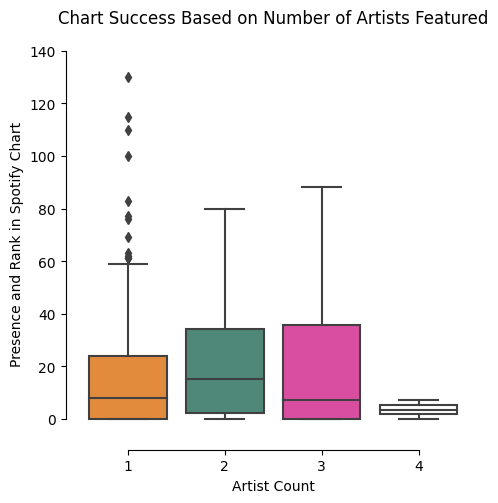

In [ ]:
# Change the datatype of "artists_count" column to string
hits = hit_songs.copy()
hits['artist_count'] = hits['artist_count'].astype(str)

# Generate a boxplot to compare the chart success of songs based on the number of artists involved
plt.figure(figsize=(5,5))
custom_palette = ["#ff8a20" ,"#46917d", "#f037a5", "#ffffff"]
sns.set_palette(custom_palette)
sns.boxplot(x=hits["artist_count"], y=hits["in_spotify_charts"])
plt.title("Chart Success Based on Number of Artists Featured", pad=20)
plt.xlabel("Artist Count")
plt.ylabel("Presence and Rank in Spotify Chart")
plt.yticks(np.arange(0, 150, 20))
sns.despine(offset=10, trim=True)
plt.show()

Clearly, songs by one artist have really high or really low positions on the charts. But songs with two artists working together usually do better overall, as shown by their middle position on the charts. However, songs with three artists, even though they usually land lower, have a wide range of positions on the charts. This shows that teaming up with others can make a big difference in how well a song does on the charts in the music world.

# **CROSS-PLATFORM PERFORMANCE**

---

In this investigation, we delve into the performance of songs across a spectrum of prominent streaming services, encompassing Apple Music, Deezer, Spotify, and Shazam.

This investigation explores how songs perform across major streaming platforms like Apple Music, Deezer, Spotify, and Shazam. It examines the success of top songs on these platforms to understand audience engagement and trends specific to each service. This analysis compares popularity, chart positions, and playlist impact, unveiling how different audiences interact with music on each platform.

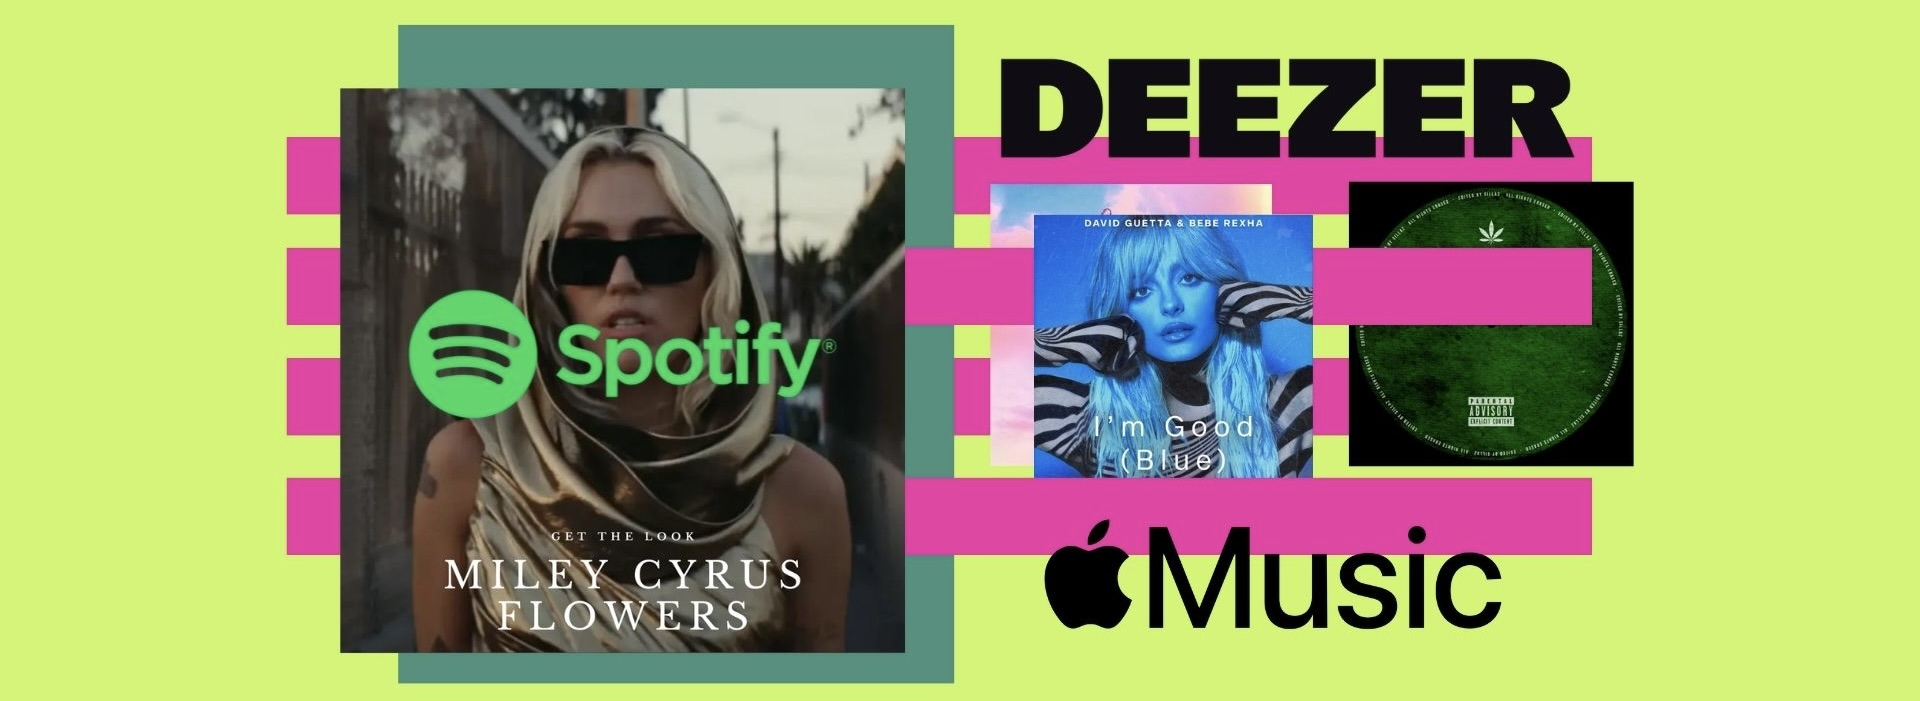

* We'll evaluate the performance of various top songs based on their **chart positions** and audience preference, gauged by their **inclusion in playlists**.

### **Chart Presence and Rank**

In [ ]:
# Create a new data frame including necessary columns
charts = hit_songs.copy()[["track_name", "artist(s)_name", "streams", "in_spotify_charts", "in_apple_charts", "in_deezer_charts", "in_shazam_charts"]].reset_index(drop=True)
charts.head()

,track_name,artist(s)_name,streams,in_spotify_charts,in_apple_charts,in_deezer_charts,in_shazam_charts
0,Cruel Summer,Taylor Swift,8.008408e+08,100,207,12,548.0
1,Ella Baila Sola,"Eslabon Armado, Peso Pluma",7.259801e+08,50,222,13,418.0
2,La Bebe - Remix,"Peso Pluma, Yng Lvcas",5.536341e+08,44,110,13,339.0
3,un x100to,"Bad Bunny, Grupo Frontera",5.056714e+08,40,205,12,251.0
4,Flowers,Miley Cyrus,1.316856e+09,115,215,58,1021.0


In [ ]:
# Songs with highest chart presence
charts["total_in_charts"] = charts[["in_spotify_charts", "in_apple_charts", "in_deezer_charts", "in_shazam_charts"]].sum(axis=1)
charts = charts.sort_values(by="total_in_charts", ascending=False).reset_index(drop=True)
charts.head()

,track_name,artist(s)_name,streams,in_spotify_charts,in_apple_charts,in_deezer_charts,in_shazam_charts,total_in_charts
0,Flowers,Miley Cyrus,1.316856e+09,115,215,58,1021.0,1409.0
1,I'm Good (Blue),"Bebe Rexha, David Guetta",1.109433e+09,80,184,45,727.0,1036.0
2,The Next Episode,"Dr. Dre, Snoop Dogg",8.433090e+08,0,40,1,953.0,994.0
3,Cruel Summer,Taylor Swift,8.008408e+08,100,207,12,548.0,867.0
4,Everybody Wants To Rule The World,Tears For Fears,1.205952e+09,25,32,0,666.0,723.0


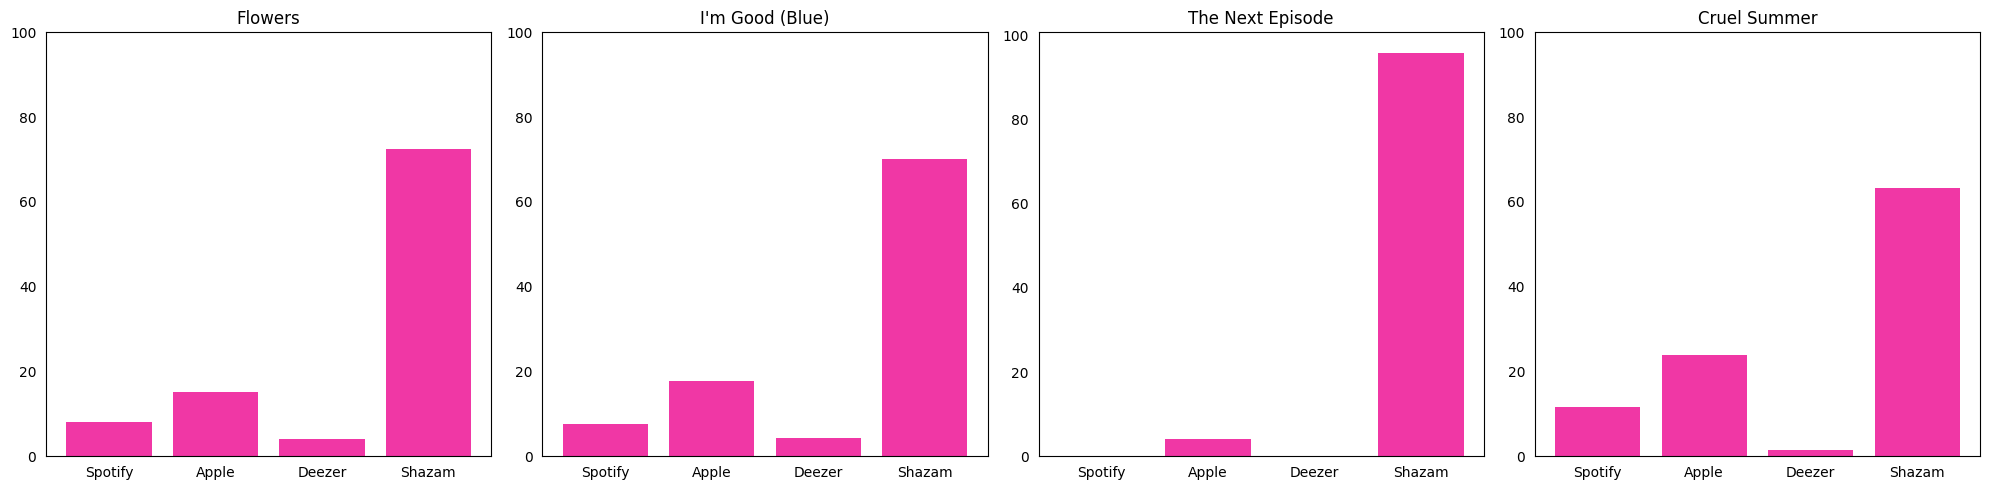

In [ ]:
# # Songs with highest chart presence
fig, axs = plt.subplots(1, 4, figsize=(20, 5))

tracks = ["Flowers", "I'm Good (Blue)", "The Next Episode", "Cruel Summer"]

for i, track in enumerate(tracks):
    track_data = charts[charts['track_name'] == track]
    platforms = ["Spotify", "Apple", "Deezer", "Shazam"]
    track_values = [
        track_data[f"in_{platform.lower()}_charts"].values[0] / track_data["total_in_charts"].values[0] * 100
        for platform in platforms
    ]
    axs[i].bar(platforms, track_values, color="#f037a5")
    axs[i].set_title(track)
    axs[i].set_yticks(np.arange(0, 120, 20))
    axs[i].tick_params(axis='x', which='both', bottom=False)
    axs[i].tick_params(axis='y', which='both', left=False)

plt.tight_layout()
plt.show()

### **Playlist Inclusion**

In [ ]:
# Create a new data frame including necessary columns
playlists = hit_songs.copy()[["track_name", "artist(s)_name", "streams", "in_spotify_playlists", "in_apple_playlists", "in_deezer_playlists"]].reset_index(drop=True)
playlists.head()

,track_name,artist(s)_name,streams,in_spotify_playlists,in_apple_playlists,in_deezer_playlists
0,Cruel Summer,Taylor Swift,8.008408e+08,7858,116,125
1,Ella Baila Sola,"Eslabon Armado, Peso Pluma",7.259801e+08,3090,34,43
2,La Bebe - Remix,"Peso Pluma, Yng Lvcas",5.536341e+08,2953,49,66
3,un x100to,"Bad Bunny, Grupo Frontera",5.056714e+08,2876,41,54
4,Flowers,Miley Cyrus,1.316856e+09,12211,300,745


In [ ]:
# Song with the greatest playlist presence
playlists["total_in_playlists"] = playlists[["in_spotify_playlists", "in_apple_playlists", "in_deezer_playlists"]].sum(axis=1)
playlists = playlists.sort_values(by="total_in_playlists", ascending=False).reset_index(drop=True)
playlists.head()

,track_name,artist(s)_name,streams,in_spotify_playlists,in_apple_playlists,in_deezer_playlists,total_in_playlists
0,Smells Like Teen Spirit - Remastered 2021,Nirvana,1.690193e+09,49991,265,12367,62623
1,Get Lucky - Radio Edit,"Pharrell Williams, Nile Rodgers, Daft Punk",9.338156e+08,52898,203,8215,61316
2,Wake Me Up - Radio Edit,Avicii,1.970673e+09,50887,315,6284,57486
3,Mr. Brightside,The Killers,1.806618e+09,51979,306,5063,57348
4,Take On Me,a-ha,1.479115e+09,44927,34,5108,50069


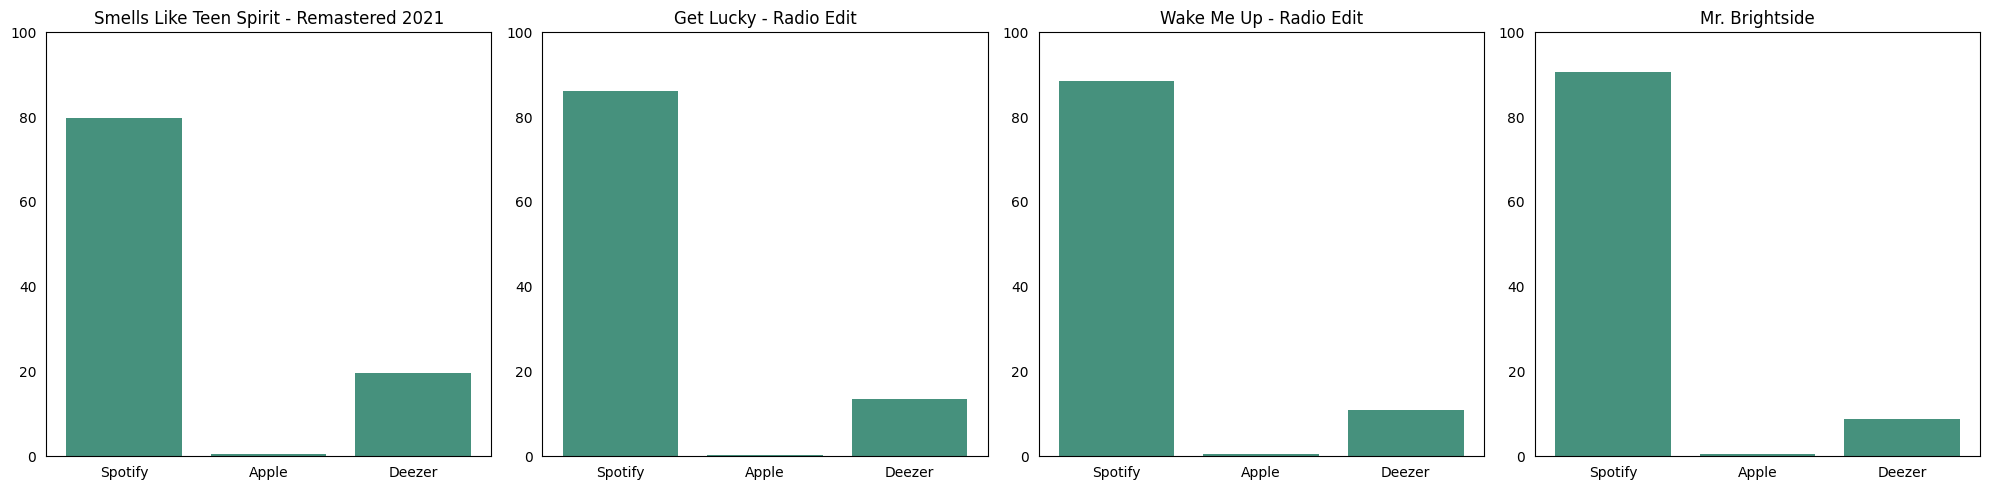

In [ ]:
# Song with the greatest playlist presence
fig, axs = plt.subplots(1, 4, figsize=(20, 5))

tracks = ["Smells Like Teen Spirit - Remastered 2021", "Get Lucky - Radio Edit", "Wake Me Up - Radio Edit", "Mr. Brightside"]

for i, track in enumerate(tracks):
    track_data = playlists[playlists['track_name'] == track]
    platforms = ["Spotify", "Apple", "Deezer"]
    track_values = [
        track_data[f"in_{platform.lower()}_playlists"].values[0] / track_data["total_in_playlists"].values[0] * 100
        for platform in platforms
    ]
    axs[i].bar(platforms, track_values, color="#46917d")
    axs[i].set_title(track)
    axs[i].set_yticks(np.arange(0, 120, 20))
    axs[i].tick_params(axis='x', which='both', bottom=False)
    axs[i].tick_params(axis='y', which='both', left=False)

plt.tight_layout()
plt.show()

**Shazam** is great for getting on the charts, while Spotify is good for being in playlists. If a song does well on both Spotify playlists and Shazam charts, it might mean it's both easy to find and keeps people interested for a long time. Musicians might want to make songs that aren't just catchy at first but also have something more that makes people want to listen to them again and again.

*   **Catchy Right Away:** Songs that are easy to remember and have great parts catch people's attention right from the start. These things make people want to Shazam the song or put it in their playlists because they like it right away. Musicians can try to create strong, memorable parts or things that make their song different and catchy from the beginning.
*   **Long-lasting Interest:** Besides being catchy, if a song stays on Spotify playlists, it might mean it has more to offer. This could be really good lyrics, complex music, emotions that people connect with, or sounds that you notice more the more you listen.


# **4. CONCLUSION**


Analyzing the top songs on Spotify in 2023 tells us a few important things:
**What Makes a Hit Song?**
*   **Danceability, Energy, Valence**, and **Acousticness** are crucial for a song to be a hit.
*   Many songs use **C#** and have a **"Major"** vibe.
*   Most songs have an average tempo of **121 beats per minute**.
**Artists Matter**
*   Songs with collaborations, especially those involving **two** artists, do better.
*   Artists who work together a lot tend to do well on charts. Different **Platforms, Different Impact**
*   People quickly recognize songs on **Shazam**.
*   **Spotify** encourages people to listen to songs repeatedly.